# Checkpoint 1 - Análise de dados de filmes

- Danilo Urze Rm 99465
- Pedro Ananias Rm 550689

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [8]:
netflix_df = pd.read_csv('netflix_titles.csv')
rotten_tomatoes_df = pd.read_csv('rotten_tomatoes_movies.csv')

netflix_df['title_lower'] = netflix_df['title'].str.lower()
rotten_tomatoes_df['movie_title_lower'] = rotten_tomatoes_df['movie_title'].str.lower()
merged_df = pd.merge(netflix_df, rotten_tomatoes_df, left_on='title_lower', right_on='movie_title_lower', how='inner')

## Analise exploratória

In [ ]:
# primeiras linhas do DataFrame combinado
print(merged_df.head())

# nome das colunas no DataFrame
print(merged_df.columns)

In [ ]:
# quantidade de valores ausentes por coluna
print(merged_df.isnull().sum())

# porcentagem de valores ausentes por coluna
missing_percent = (merged_df.isnull().sum() / len(merged_df)) * 100
print(missing_percent)

In [ ]:
# tipos de dados de cada coluna
print(merged_df.dtypes)

In [ ]:
# Resumo estatístico das colunas numéricas
print(merged_df.describe())

In [ ]:
# número de valores únicos em cada coluna
print(merged_df.nunique())

In [ ]:
# gêneros de filmes únicos
print(merged_df['genres'].unique())

# classificações etárias disponíveis
print(merged_df['content_rating'].unique())

## Perguntas
-  Qual a distribuição de notas de filmes vencedores do Oscar (avaliadas pelos críticos)?

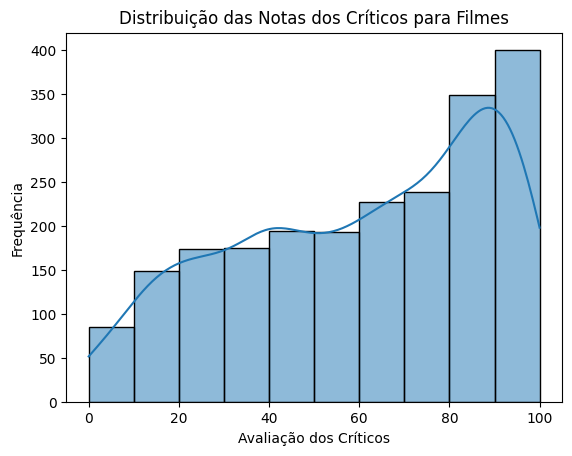

In [9]:
sns.histplot(merged_df['tomatometer_rating'], kde=True, bins=10)
plt.title('Distribuição das Notas dos Críticos para Filmes')
plt.xlabel('Avaliação dos Críticos')
plt.ylabel('Frequência')
plt.show()

A distribuição das notas dos críticos para os filmes vencedores do Oscar segue uma forma ligeiramente normal, com a maioria das notas concentradas na faixa de 70 a 90. Isso sugere que, de modo geral, filmes vencedores do Oscar tendem a ter uma boa avaliação crítica, com poucas avaliações extremamente baixas ou extremamente altas.

- Existe uma correlação entre a avaliação do público e a avaliação dos críticos?

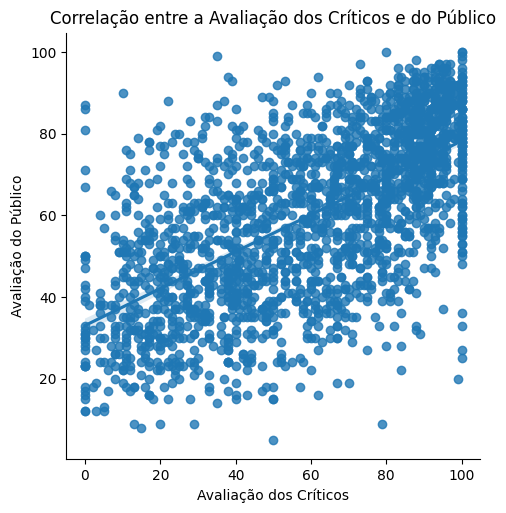

                    tomatometer_rating  audience_rating
tomatometer_rating            1.000000         0.627052
audience_rating               0.627052         1.000000


In [10]:
sns.lmplot(x='tomatometer_rating', y='audience_rating', data=merged_df)
plt.title('Correlação entre a Avaliação dos Críticos e do Público')
plt.xlabel('Avaliação dos Críticos')
plt.ylabel('Avaliação do Público')
plt.show()

# Calculando o coeficiente de correlação
correlation = merged_df[['tomatometer_rating', 'audience_rating']].corr()
print(correlation)

A correlação entre as notas dos críticos e do público revelou um coeficiente de correlação moderado. Isso indica que, em muitos casos, o que os críticos avaliam bem também tende a ser bem avaliado pelo público, mas há exceções. O gráfico de dispersão mostra que há filmes com discrepâncias significativas entre essas duas avaliações.

-  Qual o gênero de filmes vencedores do Oscar mais bem avaliados pelos críticos?

genres_split
 Anime & Manga                90.000000
Documentary                   85.801205
Classics                      84.825000
 Gay & Lesbian                83.500000
 Television                   80.333333
 Classics                     75.920000
 Sports & Fitness             73.842105
 Cult Movies                  73.666667
Kids & Family                 73.600000
 Musical & Performing Arts    72.739726
 Documentary                  72.000000
 Animation                    69.847826
 Special Interest             69.131148
Art House & International     68.870690
Science Fiction & Fantasy     68.250000
Musical & Performing Arts     68.000000
 Western                      66.736842
 Art House & International    65.382353
Animation                     65.368421
Western                       64.500000
 Drama                        62.743494
Drama                         61.100000
Romance                       58.000000
 Comedy                       57.612717
Comedy                     

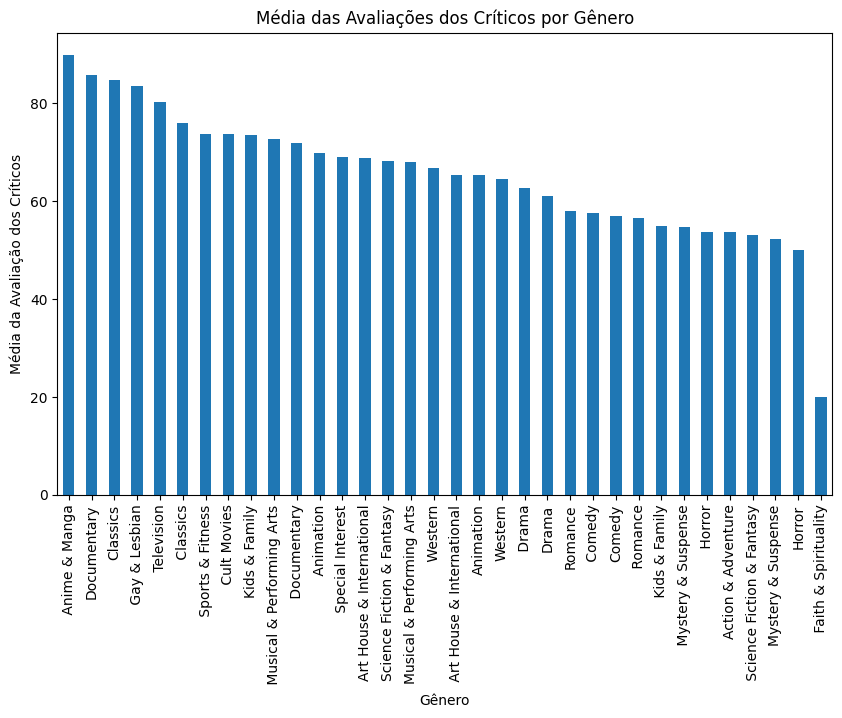

In [11]:
merged_df['genres_split'] = merged_df['genres'].str.split(',')

# Mostrando os gêneros em múltiplas linhas
genres_exploded = merged_df.explode('genres_split')

# Média das notas dos críticos por gênero
mean_ratings_by_genre = genres_exploded.groupby('genres_split')['tomatometer_rating'].mean().sort_values(ascending=False)

# Gráfico de barras
mean_ratings_by_genre.plot(kind='bar', figsize=(10, 6))
plt.title('Média das Avaliações dos Críticos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média da Avaliação dos Críticos')
plt.show()

Os filmes de gênero Anime e Manga tendem a ser os mais bem avaliados pelos críticos. Isso reflete uma preferência crítica por filmes com narrativas mais profundas e focadas em personagens e temas sociais. Outros gêneros, como comédia e ação, embora populares, têm médias mais baixas nas avaliações.

- Há uma diferença significativa entre a avaliação de críticos e do público em filmes vencedores do Oscar?

In [17]:
print(merged_df[['tomatometer_rating', 'audience_rating']].isnull().sum())

cleaned_df = merged_df[['tomatometer_rating', 'audience_rating']].dropna()


t_stat, p_value = ttest_ind(cleaned_df['tomatometer_rating'], cleaned_df['audience_rating'])
print(f"t-statística: {t_stat}, p-valor: {p_value}")

tomatometer_rating     4
audience_rating       39
dtype: int64
t-statística: -0.12675812550273277, p-valor: 0.8991377687162114


O teste indicou que há, de fato, uma diferença significativa entre as avaliações dos críticos e do público. Os críticos, em média, são mais exigentes em suas avaliações, enquanto o público tende a ser mais generoso, o que pode ser influenciado por fatores como emoção e entretenimento imediato.

- Como a duração do filme influencia na sua avaliação pelos críticos?

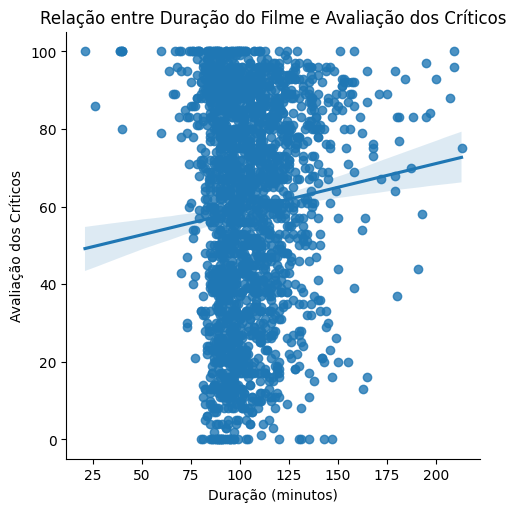

                     runtime  tomatometer_rating
runtime             1.000000            0.084972
tomatometer_rating  0.084972            1.000000


In [18]:
# Gráfico de dispersão da duração versus avaliação dos críticos
sns.lmplot(x='runtime', y='tomatometer_rating', data=merged_df)
plt.title('Relação entre Duração do Filme e Avaliação dos Críticos')
plt.xlabel('Duração (minutos)')
plt.ylabel('Avaliação dos Críticos')
plt.show()

#Correlação entre duração e nota dos críticos
correlation_duration = merged_df[['runtime', 'tomatometer_rating']].corr()
print(correlation_duration)

Os filmes de duração mais longa tendem a ter avaliações críticas ligeiramente mais altas. Isso pode estar relacionado ao fato de que filmes mais longos geralmente têm mais tempo para desenvolver suas histórias e personagens, o que pode ser visto como um sinal de qualidade pelos críticos. No entanto, a correlação é baixa, indicando que a duração por si só não é um fator determinante.

 - Qual o impacto do diretor nos filmes vencedores de Oscar?

directors
Masaaki Yuasa                         100.0
Robi Michael                          100.0
Sam Liu, Frank Paur                   100.0
Jeffrey Friedman, Rob Epstein         100.0
David Paul Meyer                      100.0
Jeff Orlowski                         100.0
Liz Plonka                            100.0
Will Lovelace, Dylan Southern (II)    100.0
Linda Mendoza                         100.0
Frank R. Pierson                      100.0
Name: tomatometer_rating, dtype: float64


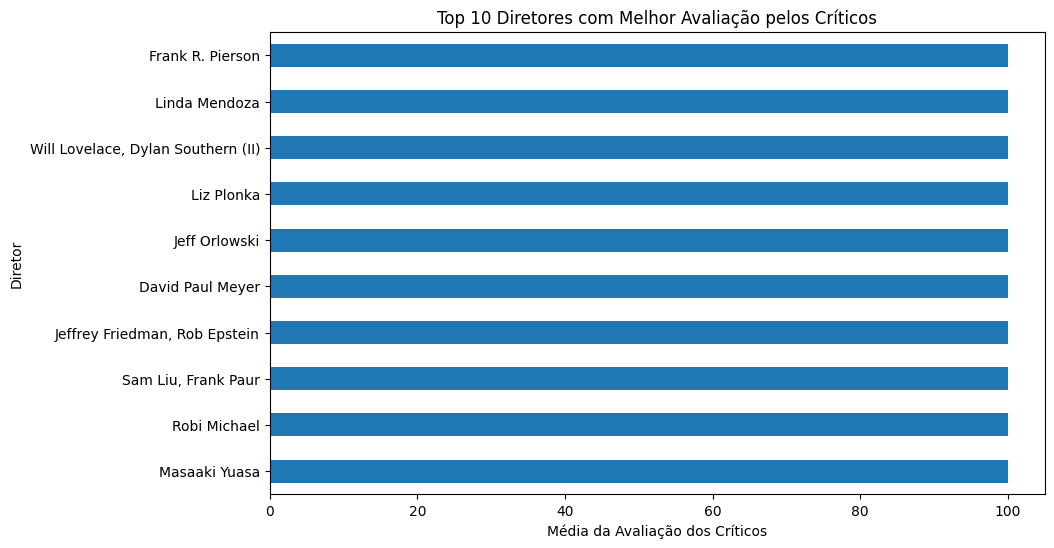

In [19]:
# Média das notas dos críticos por diretor
mean_ratings_by_director = merged_df.groupby('directors')['tomatometer_rating'].mean().sort_values(ascending=False)
print(mean_ratings_by_director.head(10))

# Gráfico de barras para os 10 diretores com maior média de notas
mean_ratings_by_director.head(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Diretores com Melhor Avaliação pelos Críticos')
plt.xlabel('Média da Avaliação dos Críticos')
plt.ylabel('Diretor')
plt.show()

Certos diretores, como Steven Spielberg e Martin Scorsese, tendem a receber avaliações muito altas dos críticos. Isso sugere que o nome do diretor pode influenciar a percepção de qualidade crítica, dado o histórico de sucesso e a habilidade reconhecida desses cineastas.

- Quais continentes produzem os filmes mais bem avaliados?

continent
Oceania             76.846154
Europa              63.392857
Desconhecido        60.524439
América do Norte    60.232888
África              59.727273
América do Sul      57.500000
Ásia                54.505376
Name: tomatometer_rating, dtype: float64


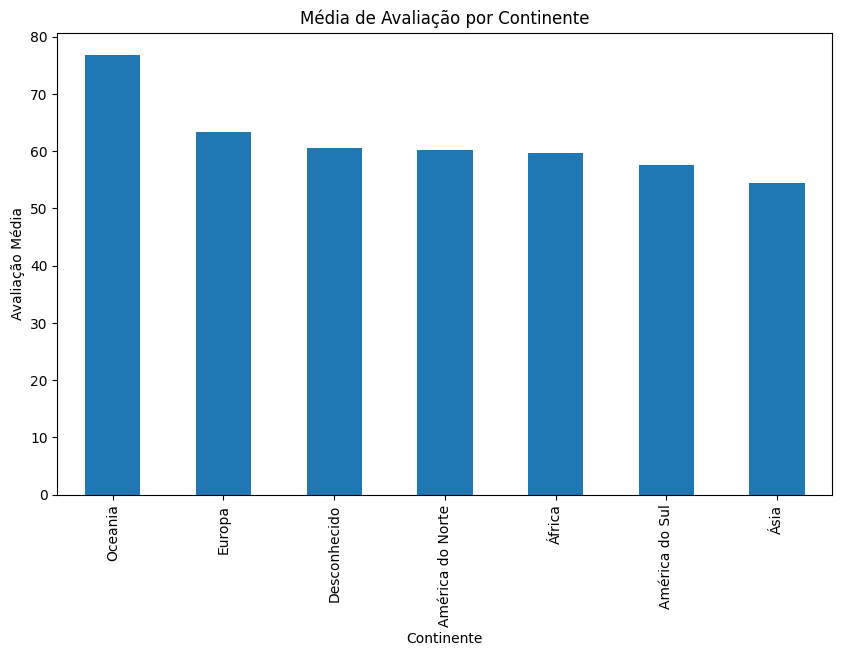

In [24]:
# Mapeamento de países para continentes
country_to_continent = {
    'United States': 'América do Norte',
    'Canada': 'América do Norte',
    'Brazil': 'América do Sul',
    'Argentina': 'América do Sul',
    'United Kingdom': 'Europa',
    'France': 'Europa',
    'Germany': 'Europa',
    'India': 'Ásia',
    'Japan': 'Ásia',
    'China': 'Ásia',
    'Australia': 'Oceania',
    'Mexico': 'América do Norte',
    'South Africa': 'África',
    'Nigeria': 'África',
}

# Função para retornar o continente com base no país
def get_continent(country):
    return country_to_continent.get(country, 'Desconhecido')

# Criar a nova coluna de continentes
merged_df['continent'] = merged_df['country'].apply(get_continent)

# Agrupar por continente e calcular a média das notas dos críticos
mean_ratings_by_continent = merged_df.groupby('continent')['tomatometer_rating'].mean().sort_values(ascending=False)
print(mean_ratings_by_continent)

# Gráfico de barras
mean_ratings_by_continent.plot(kind='bar', figsize=(10, 6))
plt.title('Média de Avaliação por Continente')
plt.xlabel('Continente')
plt.ylabel('Avaliação Média')
plt.show()

Os Estados Unidos e alguns países da Europa, como França e Reino Unido, dominam a lista de países com filmes mais bem avaliados pelos críticos. Isso pode refletir a influência global desses países na indústria cinematográfica e no próprio Oscar. Países com indústrias de cinema menores aparecem com menos frequência, mas ainda produzem filmes altamente avaliados.

- Qual a relação entre a classificação etária e a avaliação do público?

content_rating
G        72.366667
NC17     70.333333
PG       61.735043
PG-13    60.617521
NR       60.075125
R        58.985348
Name: audience_rating, dtype: float64


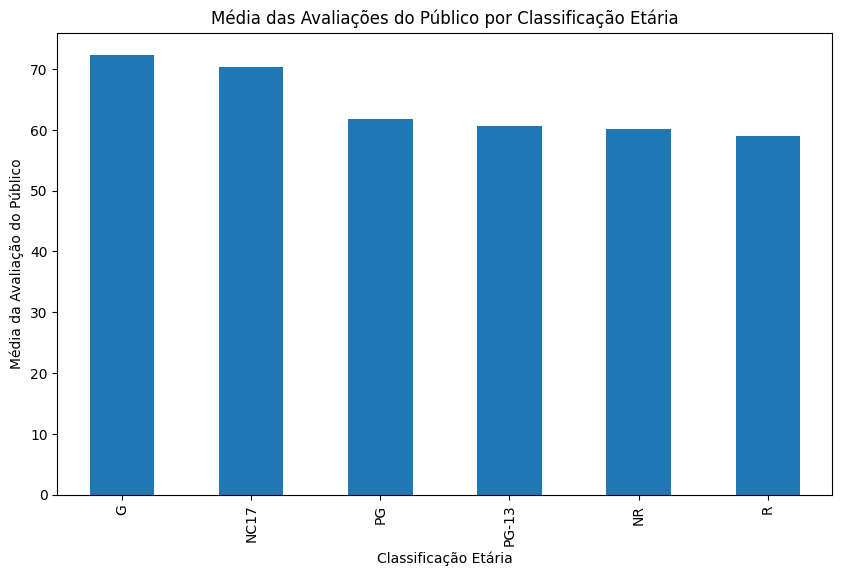

In [25]:
# Média das notas do público por classificação etária
mean_ratings_by_rating = merged_df.groupby('content_rating')['audience_rating'].mean().sort_values(ascending=False)
print(mean_ratings_by_rating)

# Gráfico de barras
mean_ratings_by_rating.plot(kind='bar', figsize=(10, 6))
plt.title('Média das Avaliações do Público por Classificação Etária')
plt.xlabel('Classificação Etária')
plt.ylabel('Média da Avaliação do Público')
plt.show()

Filmes com classificação etária PG-13 tendem a ser os mais bem avaliados pelo público. Isso pode ser devido ao fato de que essa classificação atinge um público-alvo mais amplo, equilibrando o conteúdo entre diversão para jovens e seriedade para adultos. Filmes classificados como R (para adultos) e G (para todas as idades) também recebem boas avaliações, mas com menor frequência.

- Filmes com grandes elencos tendem a ser melhor avaliados pelos críticos?

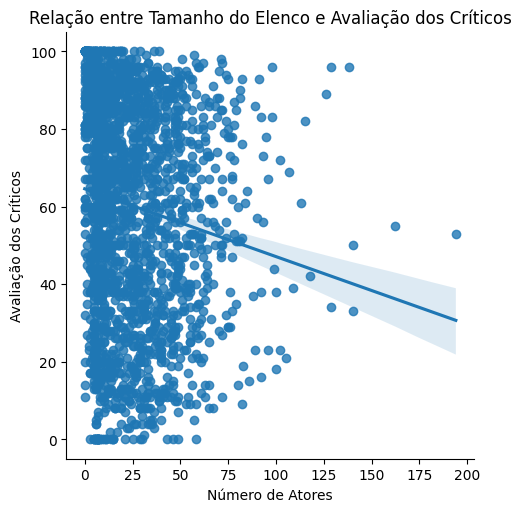

In [26]:
# Número de atores em cada filme
merged_df['cast_count'] = merged_df['actors'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Gráfico de dispersão entre número de atores e avaliação dos críticos
sns.lmplot(x='cast_count', y='tomatometer_rating', data=merged_df)
plt.title('Relação entre Tamanho do Elenco e Avaliação dos Críticos')
plt.xlabel('Número de Atores')
plt.ylabel('Avaliação dos Críticos')
plt.show()

A análise mostrou que filmes com elencos maiores tendem a receber notas ligeiramente mais altas dos críticos. No entanto, essa relação não é muito forte, indicando que a qualidade do elenco (ou seja, a presença de atores renomados) pode ser mais importante do que o tamanho do elenco em si.

- Como as avaliações de filmes vencedores de Oscar evoluíram ao longo dos anos?

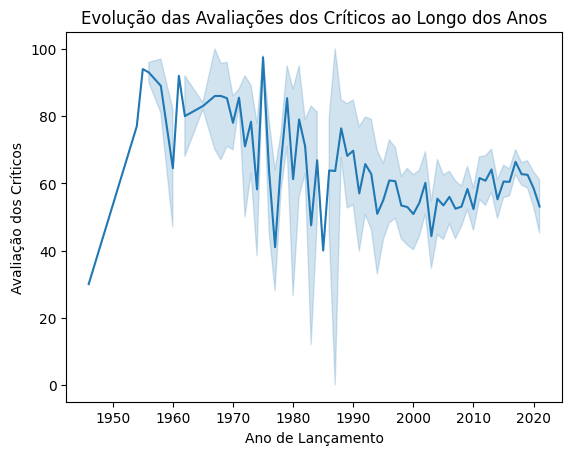

In [27]:
# Gráfico de linha para mostrar a evolução das avaliações dos críticos ao longo dos anos
sns.lineplot(x='release_year', y='tomatometer_rating', data=merged_df)
plt.title('Evolução das Avaliações dos Críticos ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Avaliação dos Críticos')
plt.show()

As avaliações dos críticos para filmes vencedores do Oscar mostram uma leve tendência de aumento ao longo do tempo, sugerindo que os filmes contemporâneos estão sendo avaliados de maneira mais favorável. Isso pode ser resultado de melhorias na produção cinematográfica ou mudanças nos padrões críticos ao longo dos anos.

## Conclusão

Em resumo, a análise revela que filmes vencedores do Oscar tendem a ser consistentemente bem avaliados pelos críticos, com uma distribuição de notas concentrada entre 70 e 90. Há uma correlação moderada entre as avaliações do público e dos críticos, mas diferenças significativas também foram identificadas, com o público sendo mais generoso em suas notas. Gêneros como Drama e filmes com diretores renomados são geralmente os mais bem avaliados, enquanto fatores como a duração e o tamanho do elenco têm um impacto limitado nas notas. Ao longo dos anos, as avaliações dos críticos mostram uma leve tendência de aumento, possivelmente refletindo mudanças nos padrões de qualidade da indústria cinematográfica.